In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline

# Prepare Dataset

In [3]:
# dict_names = glob.glob('./drive/MyDrive/data/Extracted_data/20200413/*')
# dict_names

In [4]:
import glob

# file name 지정
file_name = []
# file_name = './drive/MyDrive/data/Extracted_data/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-heavy.wav'
for date_name in glob.glob('./drive/MyDrive/data/Extracted_data/*'):
  for dict_name in glob.glob(date_name + '/*'):
    file_name.append(glob.glob(dict_name + '/*.wav'))

# 2차원으로 구성된 file_name list를 1차원으로 변경
file_name = sum(file_name, [])

In [5]:
len(file_name)

24712

In [6]:
file_name[7]

'./drive/MyDrive/data/Extracted_data/20200419/2jFheyh8bLO5peh0HPYGYjH5N9x2/vowel-e.wav'

## Audio Waveform

In [7]:
# parameter ERROR solve
import sys
sys.set_int_max_str_digits(0)

In [8]:
import numpy as np
#libraries for audio processing
import librosa
import librosa.display
from IPython.display import Audio as ipd

plt.figure(figsize=(10,5))
data, sample_rate = librosa.load(file_name[7])
librosa.display.waveshow(data,sr=sample_rate)
ipd(file_name[7])

Output hidden; open in https://colab.research.google.com to view.

#Audio Processing
##FFT(Fast Fourier Transform)

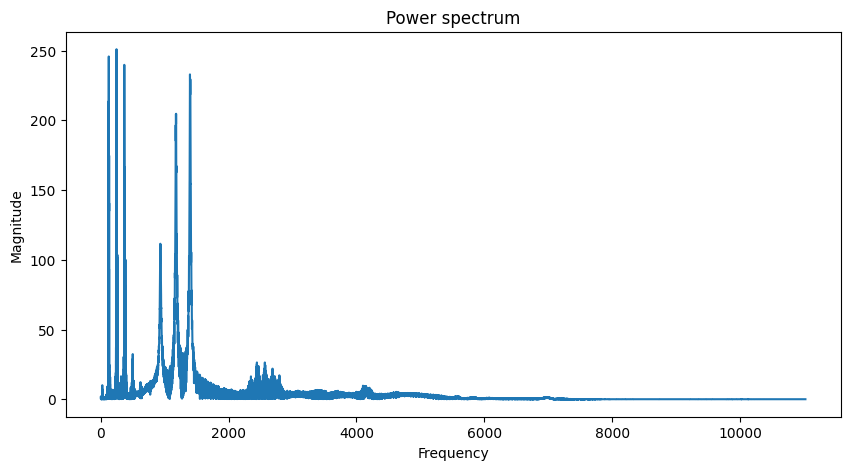

In [9]:
fft = np.fft.fft(data)

magnitude = np.abs(fft)
frequency = np.linspace(0,sample_rate,len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.figure(figsize=(10,5))
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

그래프를 통해 주파수가 1000Hz 이하에 많이 분포하고 있음을 확인할 수 있다

## STFT(Short-Time Fourier Transform)

In [10]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(data,n_fft=n_fft,hop_length=hop_length)
spectrogram = np.abs(stft)
print("Spectogram:\n", spectrogram)

Spectogram:
 [[2.14030313e-12 1.20927325e-04 5.99629493e-05 ... 4.11160814e-04
  6.85478881e-05 4.83577722e-04]
 [3.21445561e-12 1.13825197e-04 3.97488184e-04 ... 3.20210384e-04
  2.45307281e-04 6.77995034e-04]
 [5.12644701e-12 1.00417536e-04 5.46292518e-04 ... 6.46425644e-04
  8.44873080e-04 1.07555650e-03]
 ...
 [1.52322935e-12 6.72312483e-10 1.65048974e-09 ... 2.28445085e-09
  1.62344768e-05 4.01231264e-05]
 [1.20656621e-12 9.26530797e-10 1.23146249e-09 ... 2.69796158e-10
  1.62297129e-05 4.01185607e-05]
 [1.06075988e-12 9.76711267e-10 1.56371627e-09 ... 6.39094333e-10
  1.62280139e-05 4.01129982e-05]]


### Spectogram

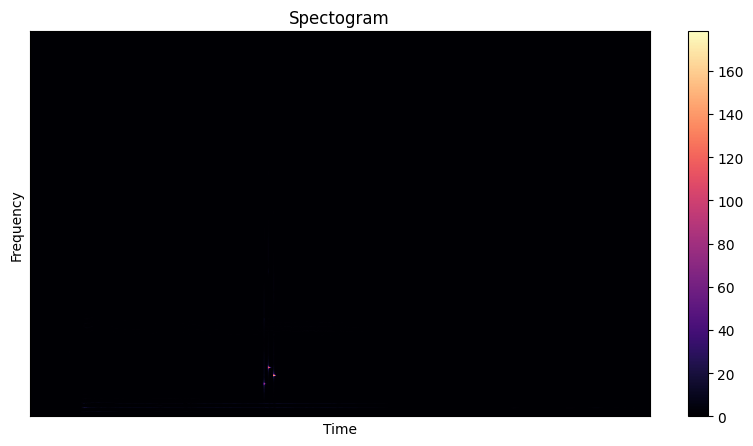

In [11]:
plt.figure(figsize= (10, 5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectogram")
plt.show()

주파수의 정도를 색깔로 확인할 수 있다.

### Log-Spectogram

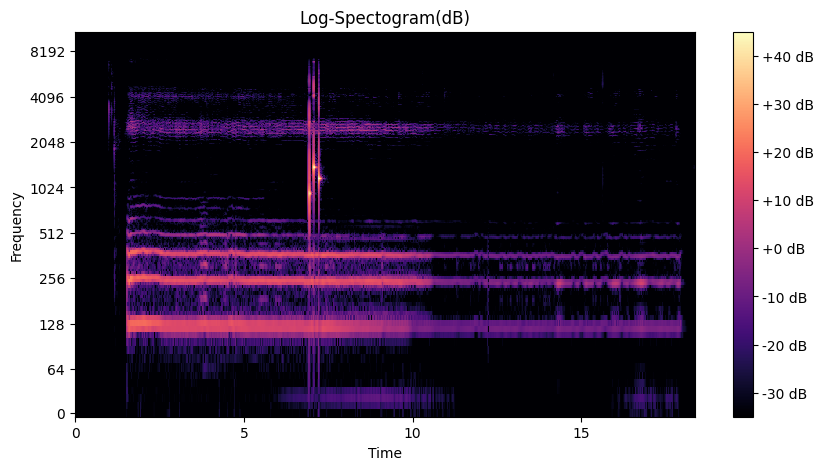

In [12]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize= (10, 5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="log")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log-Spectogram(dB)")
plt.show()

1024Hz 이하의 낮은 주파수 대역에 위치하고 있음을 확인할 수 있다

specrogram은 시간에 따라 변화하는 신호의 주파수 스펙트럼의 크기를 시각적으로 표현한 것으로 보통 퓨리에 변환 이후 dB scaling을 적용한 log spectogram을 구한다. 다분히 시각적인 이유 뿐 만 아니라 사람의 청각 또한 소리를 dB scale로 인식하기 때문에 이렇게 나타내는 것이 분석에 용이하다

## MFCC(Mel Frequency Cepstral Coefficient)

출처: https://brightwon.tistory.com/11
1. MFCC는 오디오 신호에서 추출할 수 있는 feature로, **소리의 고유한 특징**을 나타내는 수치
2. 주로 음성 인식, 화자 인식, 음성 합성, 음악 장르 분류 등 오디오 도메인의 문제를 해결하는데 사용
3. MFCC는 Mel Spectrum(멜 스펙트럼)에서 Cepstral 분석을 통해 추출된 값
  - **Spectrum(스펙트럼)**: 각 주파수의 대역별 세기를 알 수 있어, 신호에서 어떤 주파수가 강하고 약한지 알 수 있다
  - **Cepstrum(켑스트럼)**: 주파수의 정보를 가진 Spectrum에서 소리의 고유한 특징을 추출할 때 사용하는 방법
  - **Mel Spectrum(멜 스펙트럼)**: Spectrum 중 특수한 필터링을 가진 것

  <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F7ggDB%2FbtqwO5I2Gdh%2FveLjujqRwv9nCNTWTYykok%2Fimg.png">

1. 오디오 신호를 프레임별로 나누어 FFT를 적용해 Spectrum을 구한다
2. Spectrum에 Mel Filter Bank를 적용해 Mel Spectrum을 구한다
3. Mel Spectrum에 Cepstral 분석을 통해 MFCC를 구한다

- sr

default값은 22050Hz이다. 앞서 음성 데이터를 load 할 때 sr을 16000Hz으로 했기 때문에 꼭 sr=16000을 파라미터로 삽입해야 한다. (사람의 목소리는 대부분 16000Hz 안에 포함된다고 한다)

- n_mfcc

return 될 mfcc의 개수를 정해주는 파라미터이다. default값은 20이다.

- n_fft

win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터 default는 win_length와 같다.일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있으며 16000Hz인 음성에서는 400에 해당하는 값이다. (16000 * 0.025 = 400) 즉, n_fft는 sr에 frame_length인 0.025를 곱한 값이다.

- hop_length

얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터, 10ms를 기본으로 하고 있어 16000Hz인 음성에서는 160에 해당한다.(16000 * 0.01 = 160) 즉, hop_length는 sr에 frame_stride인 0.01를 곱해서 구할 수 있다.

window_length가 0.025이고 frame_stride가 0.01이라고 하면 0.015초씩은 데이터를 겹치면서 읽는다고 생각하면 됩니다.

MFCC를 한다면, 이를 참고 https://youdaeng-com.tistory.com/5

In [13]:
mfccs = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=30)

print("MFCC Shape: ", mfccs.shape)
print("MFCC:\n", mfccs)

MFCC Shape:  (30, 791)
MFCC:
 [[-5.4810907e+02 -5.4810907e+02 -5.4810907e+02 ... -5.4810907e+02
  -5.4700043e+02 -5.4637524e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   5.0079572e-01  7.4779689e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -1.2470850e+00 -1.9904345e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -8.4984565e-01 -1.2399517e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -1.3119466e+00 -1.3581942e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   6.5127425e-03  3.1000322e-01]]


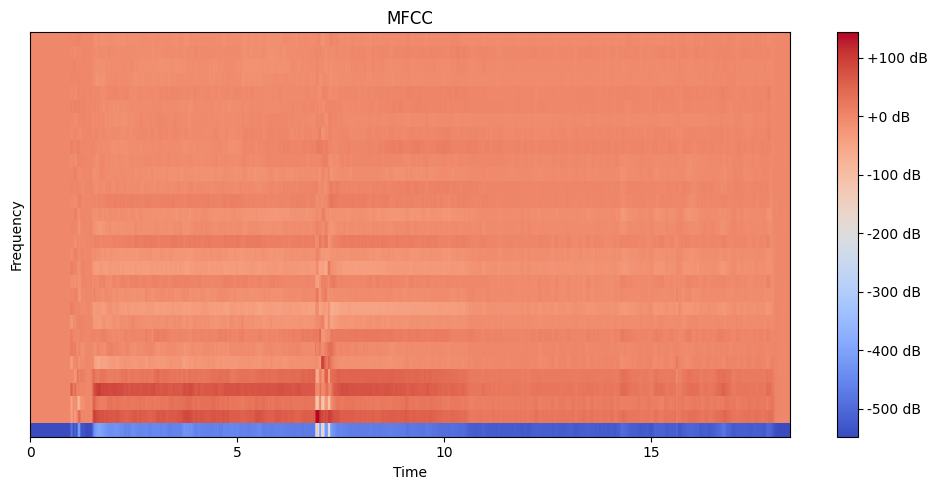

In [14]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()

In [15]:
#### Applying this to entire dataset of audio files
def extract_features(file):
    data,sample_rate=librosa.load(file)
    mfccs = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=30)
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    return mfccs_scaled

In [16]:
# 전체 path에서 화자 id만 추출
def get_id(file):
    path=file.split('/')[6].split('.')[0]
    return path

In [17]:
# 전체 path에서 어떤 sound인지 추출
def get_soundName(file):
    path=file.split('/')[7].split('.')[0]
    return path

In [18]:
# data를 분리하기 위한 준비
vowel_o = []
vowel_a = []
vowel_e = []
counting_normal = []
counting_fast = []
cough_shallow = []
cough_heavy = []
breathing_shallow = []
breathing_deep = []

In [19]:
error_count = 0
for file in file_name:
  match (get_soundName(file)):
    case "vowel-o":
      vowel_o.append(file)
    case "vowel-a":
      vowel_a.append(file)
    case "vowel-e":
      vowel_e.append(file)
    case "counting-normal":
      counting_normal.append(file)
    case "counting-fast":
      counting_fast.append(file)
    case "cough-shallow":
      cough_shallow.append(file)
    case "cough-heavy":
      cough_heavy.append(file)
    case "breathing-shallow":
      breathing_shallow.append(file)
    case "breathing-deep":
      breathing_deep.append(file)
    case _:
      print(f"ERROR {file}")
      error_count += 1
  if error_count == 10:
    break

print(f"ERROR COUNT: {error_count}")

ERROR COUNT: 0


In [20]:
# 각각의 sound 별로 mfcc를 구하는 방식
# mfcc말고 model을 위해서라면 normalized data를 구하기 위해 feature_extract 함수를 사용할 것.
extract_vo={"labels": [], "mfcc": []}
count = 0

for file in vowel_o:
  if count < 100:
    print(f"{count}  - - {file}")
  data,sample_rate=librosa.load(file)
  mfcc_vo = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=30)
  Id = get_id(file)
  extract_vo["mfcc"].append(mfcc_vo)
  extract_vo["labels"].append(Id)
  count += 1

print('Extraction completed')

0  - - ./drive/MyDrive/data/Extracted_data/20200419/2jFheyh8bLO5peh0HPYGYjH5N9x2/vowel-o.wav
1  - - ./drive/MyDrive/data/Extracted_data/20200419/HtCYru78WihN83VInC0etddLCv62/vowel-o.wav
2  - - ./drive/MyDrive/data/Extracted_data/20200419/MEEGIoNSX4exg4oIL3Q9MdysPJq1/vowel-o.wav
3  - - ./drive/MyDrive/data/Extracted_data/20200419/OnSOmvzzE2WLcwfrSyNbh0B89n72/vowel-o.wav
4  - - ./drive/MyDrive/data/Extracted_data/20200419/Qriv4y0rwfWRZDatFMOj9zdXeB43/vowel-o.wav
5  - - ./drive/MyDrive/data/Extracted_data/20200419/RQqyn5Ur0gcPPYhafDG9DDfIgVh2/vowel-o.wav
6  - - ./drive/MyDrive/data/Extracted_data/20200419/TXlvBOBGo0ReXW3AHhF5acgJ5Hm2/vowel-o.wav
7  - - ./drive/MyDrive/data/Extracted_data/20200419/U5XZPZXjrqNPn4Eo3T2Ti46VNVJ2/vowel-o.wav
8  - - ./drive/MyDrive/data/Extracted_data/20200419/UbRWBwc42vQH5WKiUUP89RvPlA92/vowel-o.wav
9  - - ./drive/MyDrive/data/Extracted_data/20200419/XFX3DxpzWlTsqde0wmliVzvRXnf1/vowel-o.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


10  - - ./drive/MyDrive/data/Extracted_data/20200419/XlPcBLOUHdNZwOeNJvVy1KfjQDf2/vowel-o.wav
11  - - ./drive/MyDrive/data/Extracted_data/20200419/Y5YzktJpmdMp3h3YOTEWcxE41F83/vowel-o.wav
12  - - ./drive/MyDrive/data/Extracted_data/20200419/gfAVpM1IV5RhiO6CAiOjjn1AHVG2/vowel-o.wav
13  - - ./drive/MyDrive/data/Extracted_data/20200419/lS9YdIeCTmfaDKr4AgtF1hjdlR23/vowel-o.wav
14  - - ./drive/MyDrive/data/Extracted_data/20200419/rsVzlx8x0INOnHAt8Xu6jrxeGqG2/vowel-o.wav
15  - - ./drive/MyDrive/data/Extracted_data/20200419/tkr2LeHuJyNXW3uM4NUZBmp1qIb2/vowel-o.wav
16  - - ./drive/MyDrive/data/Extracted_data/20200419/vxQXoOBf9Oa0zTwHaKRyHqiUQTB2/vowel-o.wav
17  - - ./drive/MyDrive/data/Extracted_data/20200419/zir8PPnBwfOaT05GrKj9nK4opfk1/vowel-o.wav
18  - - ./drive/MyDrive/data/Extracted_data/20200419/1irqEfgfrbXwr2ymwtkMB1Y0rnB3/vowel-o.wav
19  - - ./drive/MyDrive/data/Extracted_data/20200419/GANtY5XDqOUFMC2lEizSdBuainB2/vowel-o.wav
20  - - ./drive/MyDrive/data/Extracted_data/20200419/GMjhTrV

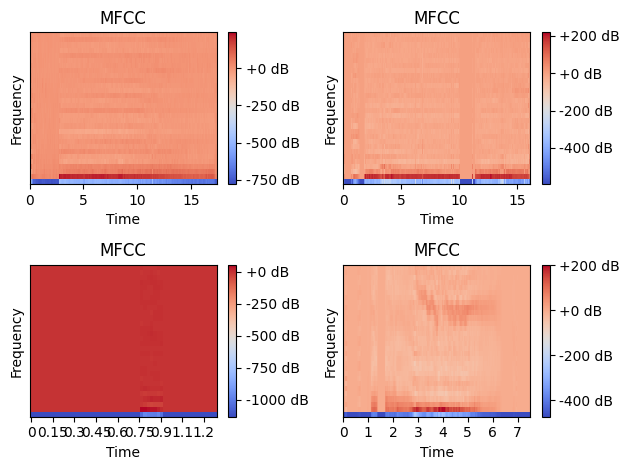

In [22]:
plt.subplot(221)
librosa.display.specshow(extract_vo["mfcc"][0], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()
plt.subplot(222)
librosa.display.specshow(extract_vo["mfcc"][1], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()
plt.subplot(223)
librosa.display.specshow(extract_vo["mfcc"][92], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()
plt.subplot(224)
librosa.display.specshow(extract_vo["mfcc"][62], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()

In [21]:
extract_ve={"labels": [], "mfcc": []}
count = 0

for file in vowel_e:
  if count < 100:
    print(f"{count}  - - {file}")
  data,sample_rate=librosa.load(file)
  mfcc_ve = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=30)
  Id = get_id(file)
  extract_ve["mfcc"].append(mfcc_ve)
  extract_ve["labels"].append(Id)
  count += 1

print('Extraction completed')

0  - - ./drive/MyDrive/data/Extracted_data/20200419/2jFheyh8bLO5peh0HPYGYjH5N9x2/vowel-e.wav
1  - - ./drive/MyDrive/data/Extracted_data/20200419/HtCYru78WihN83VInC0etddLCv62/vowel-e.wav
2  - - ./drive/MyDrive/data/Extracted_data/20200419/MEEGIoNSX4exg4oIL3Q9MdysPJq1/vowel-e.wav
3  - - ./drive/MyDrive/data/Extracted_data/20200419/OnSOmvzzE2WLcwfrSyNbh0B89n72/vowel-e.wav
4  - - ./drive/MyDrive/data/Extracted_data/20200419/Qriv4y0rwfWRZDatFMOj9zdXeB43/vowel-e.wav
5  - - ./drive/MyDrive/data/Extracted_data/20200419/RQqyn5Ur0gcPPYhafDG9DDfIgVh2/vowel-e.wav
6  - - ./drive/MyDrive/data/Extracted_data/20200419/TXlvBOBGo0ReXW3AHhF5acgJ5Hm2/vowel-e.wav
7  - - ./drive/MyDrive/data/Extracted_data/20200419/U5XZPZXjrqNPn4Eo3T2Ti46VNVJ2/vowel-e.wav
8  - - ./drive/MyDrive/data/Extracted_data/20200419/UbRWBwc42vQH5WKiUUP89RvPlA92/vowel-e.wav
9  - - ./drive/MyDrive/data/Extracted_data/20200419/XFX3DxpzWlTsqde0wmliVzvRXnf1/vowel-e.wav
10  - - ./drive/MyDrive/data/Extracted_data/20200419/XlPcBLOUHdNZwOeNJ

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1882
  warnings.warn(


Extraction completed


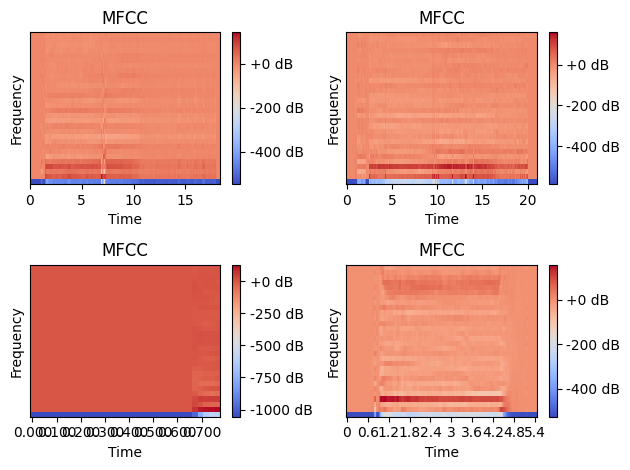

In [23]:
plt.subplot(221)
librosa.display.specshow(extract_ve["mfcc"][0], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()
plt.subplot(222)
librosa.display.specshow(extract_ve["mfcc"][1], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()
plt.subplot(223)
librosa.display.specshow(extract_ve["mfcc"][92], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()
plt.subplot(224)
librosa.display.specshow(extract_ve["mfcc"][62], sr=sample_rate, hop_length=hop_length, x_axis="time")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("MFCC")
plt.tight_layout()